# Multimodal Models
When a task requires a model to be able to take as an input more than one type of data, like an image and a sentence, we will call it as **multimodal**. When we think about multimodal models we immediately think about CHatGPT where we can send text, image and audio.<br>
Here we will perform image-to-text matching, image captioning, visual Q&A and zero-shot image classification. For the first three tasks we will be using the Bleep model and for the last task we will be using the Clip model from OpenAI.

In [1]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

In [3]:
import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

## Task 1: Image-Text Retrieval

In [4]:
from transformers import BlipForImageTextRetrieval

In [5]:
model = BlipForImageTextRetrieval.from_pretrained(
"Salesforce/blip-itm-base-coco")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

More info about [Salesforce/blip-itm-base-coco](https://huggingface.co/Salesforce/blip-itm-base-coco).

In [6]:
from transformers import AutoProcessor

In [7]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-itm-base-coco")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [8]:
from PIL import Image

In [9]:
raw_image =  Image.open("man&cat.jpg").convert('RGB')

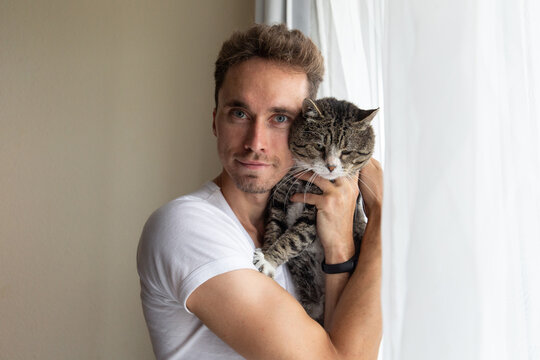

In [10]:
raw_image

Passing the image and text into the processor will modify them in such a way that the model will be able to understand it.

In [11]:
text = "an image of a man holding a cat"

In [12]:
inputs = processor(images=raw_image,
                   text=text,
                   return_tensors="pt")

retrun_tensor is set to pt so that it returns a PyTorch tensor.

In [13]:
inputs

{'pixel_values': tensor([[[[ 2.0772e-01,  1.7853e-01,  1.9312e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          [ 2.0772e-01,  1.7853e-01,  1.9312e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          [ 2.0772e-01,  1.9312e-01,  2.0772e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          ...,
          [ 2.9531e-01,  3.2451e-01,  3.2451e-01,  ...,  1.7406e+00,
            1.7552e+00,  1.7844e+00],
          [ 3.2451e-01,  2.9531e-01,  3.0991e-01,  ...,  1.7552e+00,
            1.7552e+00,  1.7844e+00],
          [ 3.2451e-01,  2.8071e-01,  2.9531e-01,  ...,  1.7552e+00,
            1.7698e+00,  1.7990e+00]],

         [[ 1.2387e-01,  1.0887e-01,  1.2387e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
          [ 1.2387e-01,  1.0887e-01,  1.2387e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
          [ 1.2387e-01,  1.2387e-01,  1.3888e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
   

In [14]:
itm_scores = model(**inputs)[0]

**NOTE:** we have to add a double star before passing inputs as the input is a dictionary that contains the arguements.

In [15]:
itm_scores

tensor([[-1.7542,  1.7517]], grad_fn=<AddmmBackward0>)

These numbers in form of tensor are the logits of the model and to convert these values into something that we can understand, we need to pass them into a softmax layer. The output of this number into the softmax will give us the probability.

In [16]:
import torch

In [17]:
itm_score = torch.nn.functional.softmax(itm_scores,dim=1)
itm_score

tensor([[0.0291, 0.9709]], grad_fn=<SoftmaxBackward0>)

Now we got a tensor with two values, the first value is the probability that the image and the text are not matched which is very low. And the second value is the probability that they are matched.

In [18]:
print(f"""The image and text are matched with a probability of {itm_score[0][1]:.4f}""")

The image and text are matched with a probability of 0.9709


In [19]:
text2 = "an image of a cat holding a man"

In [20]:
inputs2 = processor(images=raw_image,
                   text=text2,
                   return_tensors="pt")

In [21]:
itm_scores2 = model(**inputs2)[0]
itm_score2 = torch.nn.functional.softmax(itm_scores2,dim=1)

In [22]:
print(f"""The image and text are matched with a probability of {itm_score2[0][1]:.4f}""")

The image and text are matched with a probability of 0.9864


## Task 2: Image Captioning
For this task we will use the same Bleep model but with different weights. We ask the model to return the description of the image, we can let the model know the output text should start with "A man...".

In [23]:
from transformers import BlipForConditionalGeneration

In [24]:
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Info about [Salesforce/blip-image-captioning-base](https://huggingface.co/Salesforce/blip-image-captioning-base)

In [25]:
from transformers import AutoProcessor

In [26]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [27]:
image = raw_image

### Conditional Image Captioning

In [28]:
text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")

In [29]:
inputs

{'pixel_values': tensor([[[[ 2.0772e-01,  1.7853e-01,  1.9312e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          [ 2.0772e-01,  1.7853e-01,  1.9312e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          [ 2.0772e-01,  1.9312e-01,  2.0772e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          ...,
          [ 2.9531e-01,  3.2451e-01,  3.2451e-01,  ...,  1.7406e+00,
            1.7552e+00,  1.7844e+00],
          [ 3.2451e-01,  2.9531e-01,  3.0991e-01,  ...,  1.7552e+00,
            1.7552e+00,  1.7844e+00],
          [ 3.2451e-01,  2.8071e-01,  2.9531e-01,  ...,  1.7552e+00,
            1.7698e+00,  1.7990e+00]],

         [[ 1.2387e-01,  1.0887e-01,  1.2387e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
          [ 1.2387e-01,  1.0887e-01,  1.2387e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
          [ 1.2387e-01,  1.2387e-01,  1.3888e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
   

In [30]:
out = model.generate(**inputs)
out

tensor([[30522,  1037,  9982,  1997,  1037,  2158,  3173,  1037,  4937,   102]])

In [31]:
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of a man holding a cat


### Unconditional Image Captioning

In [32]:
inputs = processor(image,return_tensors="pt")

In [33]:
out = model.generate(**inputs)

In [34]:
print(processor.decode(out[0], skip_special_tokens=True))

a man holding a cat


## Task 3: Visual Question Answering
Here we can give the model a picture and we can ask question related to that image.

In [35]:
from transformers import BlipForQuestionAnswering

In [36]:
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Info about [Salesforce/blip-vqa-base](https://huggingface.co/Salesforce/blip-vqa-base)

In [37]:
from transformers import AutoProcessor

In [38]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-vqa-base")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [39]:
question = "Name the animal present in the picture?"

In [40]:
inputs = processor(image, question, return_tensors="pt")

In [41]:
out = model.generate(**inputs)

In [42]:
print(processor.decode(out[0], skip_special_tokens=True))

cat


## Task 4: Zero-shot Classification
Here we will use the CLIP model from OpenAI to classify image. Zero-shot means the model will be able to classify the image from among the list of any labels that we give it. Here we don't have to fine-tune the model to recognize specific categories. Example pass a list consisiting labels like: planes, cats, dogs, trees, etc and the model will choose the most likely label.

In [43]:
from transformers import CLIPModel

In [44]:
model = CLIPModel.from_pretrained(
    "openai/clip-vit-large-patch14")

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [45]:
from transformers import AutoProcessor

In [46]:
processor = AutoProcessor.from_pretrained(
    "openai/clip-vit-large-patch14")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

More info about [openai/clip-vit-large-patch14](https://huggingface.co/openai/clip-vit-large-patch14).

In [47]:
labels = ["a photo of a cat", "a photo of a dog", "a photo of a man", "a photo of a human"]

In [48]:
inputs = processor(text=labels,
                   images=image,
                   return_tensors="pt",
                   padding=True)

Here we add padding in case the label lengths are not the same.

In [49]:
outputs = model(**inputs)
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[22.0966, 17.0880, 20.5824, 20.6752]], grad_fn=<TBackward0>), logits_per_text=tensor([[22.0966],
        [17.0880],
        [20.5824],
        [20.6752]], grad_fn=<MulBackward0>), text_embeds=tensor([[-0.0031,  0.0028,  0.0291,  ...,  0.0227,  0.0088,  0.0132],
        [ 0.0091, -0.0039,  0.0203,  ...,  0.0310,  0.0025,  0.0109],
        [-0.0151,  0.0186,  0.0405,  ...,  0.0447,  0.0120,  0.0221],
        [ 0.0013, -0.0004,  0.0461,  ...,  0.0382,  0.0215,  0.0067]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-1.4012e-02,  2.5559e-02,  2.6974e-02, -6.0873e-02,  1.5789e-02,
          7.5767e-03,  1.6523e-03, -5.6480e-02, -2.0830e-03, -1.2771e-02,
         -3.0887e-02,  3.5978e-02,  1.0319e-02,  9.6635e-03,  5.0191e-02,
         -2.7867e-02, -6.5586e-02,  6.5332e-03, -2.3036e-02, -7.4305e-03,
         -5.7825e-03, -8.9989e-03,  3.3459e-02,  4.5992e-03,  2.8734e-02,
         -1.9475e-02, -1.0412e-02, -3.7814e-02, -2.5856e-02, -1.4

In [50]:
outputs.logits_per_image

tensor([[22.0966, 17.0880, 20.5824, 20.6752]], grad_fn=<TBackward0>)

In [51]:
probs = outputs.logits_per_image.softmax(dim=1)[0]
probs

tensor([0.6812, 0.0046, 0.1498, 0.1644], grad_fn=<SelectBackward0>)

In [52]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of a cat - probability of 0.6812
label: a photo of a dog - probability of 0.0046
label: a photo of a man - probability of 0.1498
label: a photo of a human - probability of 0.1644
